In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

from datetime import datetime

matplotlib.rc('font', family = 'Noto Sans CJK JP')
matplotlib.rc('axes', unicode_minus = False)
plt.style.use(['fivethirtyeight'])
import seaborn as sns



from scipy import stats
import scipy.stats
from scipy.stats import shapiro
from scipy.stats import bartlett, levene
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from statsmodels.tools.eval_measures import rmse

from sklearn.tree import export_graphviz

import graphviz
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from IPython.core.display import display, HTML
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering,KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from dask.diagnostics import ProgressBar
#import statsmodels.api as sm
from statsmodels.api import Logit
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score, f1_score, roc_curve, auc, precision_score,recall_score
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
np.random.seed(1234)


display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
df = pd.read_csv('final_merged_dataset.csv')

In [3]:
df

,No_Die,Ox_Chamber,process,type,Temp_OXid,Vapor,ppm,Pressure,Oxid_time,thickness,...,Furance_Temp,RTA_Temp,count_ion,Target,Error_message,Wafer_map,chamber_total_count,chamber_path,defective,defective_chip_rate
0,NOLSM325131325,2,Oxidation,dry,1214.307948,O2,26.69,0.203,120,713.132,...,854.0,154,582,141,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,2907,21111,0,0.0705
1,NOLSM326132326,2,Oxidation,dry,978.110792,O2,30.86,0.217,137,714.295,...,895.0,156,542,55,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 2 0 0 0 0 0 0 ...,2819,21122,0,0.0275
2,NOLSM327133327,2,Oxidation,dry,1176.019149,O2,31.07,0.218,116,710.114,...,898.0,152,550,96,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,2847,21133,0,0.0480
3,NOLSM328134328,2,Oxidation,dry,933.442733,O2,31.04,0.196,143,710.617,...,879.0,155,582,105,none,[[0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 2 0 0 0 0 0 0 ...,2907,21111,0,0.0525
4,NOLSM329135329,2,Oxidation,wet,1140.598752,H2O,31.37,0.215,76,711.632,...,882.0,155,542,79,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 ...,2819,21122,0,0.0395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653,NOLSM3081211,1,Oxidation,dry,1160.350439,O2,34.56,0.199,18,710.197,...,883.0,153,582,105,none,[[0 0 0 0 0 0 0 0 0 0 1 2 2 1 1 1 0 0 0 0 0 0 ...,2902,13311,0,0.0525
1654,NOLSM8493212,1,Oxidation,wet,1268.105427,H2O,45.07,0.215,22,707.179,...,867.0,152,550,42,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 1 0 0 0 0 0 0 ...,2878,11133,0,0.0210
1655,NOLSM8503213,1,Oxidation,wet,1279.160563,H2O,45.12,0.214,21,712.946,...,868.0,152,542,42,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 1 0 0 0 0 0 0 ...,2821,11222,0,0.0210
1656,NOLSM8513214,1,Oxidation,wet,1272.804948,H2O,45.34,0.213,20,711.987,...,868.0,152,582,24,none,[[0 0 0 0 0 0 0 0 0 0 2 1 2 2 2 1 0 0 0 0 0 0 ...,2938,11311,0,0.0120


In [4]:
effective_num_list = ['Pressure', 'Temp_OXid', 'ppm', 'Oxid_time', 'Energy_Exposure', 
                      'temp_HMDS_bake', 'spin1', 'spin3', 'photoresist_bake', 'temp_softbake', 'Source_Power', 
                      'Selectivity', 'Temp_Etching', 'Flux90s', 'Flux160s', 'Flux840s', 'Temp_implantation', 'RTA_Temp']

effective_str_list = ['type', 'UV_type']

In [5]:
effective_list = effective_num_list + effective_str_list

In [6]:
Y = ['defective']

In [7]:
columns_for_modeling = Y + effective_list

In [8]:
df_raw = df[columns_for_modeling];df_raw

,defective,Pressure,Temp_OXid,ppm,Oxid_time,Energy_Exposure,temp_HMDS_bake,spin1,spin3,photoresist_bake,...,Source_Power,Selectivity,Temp_Etching,Flux90s,Flux160s,Flux840s,Temp_implantation,RTA_Temp,type,UV_type
0,0,0.203,1214.307948,26.69,120,109.628,200.551,502.391,4903.611,5.020,...,52.103,1.030,72.651,1.316363e+17,6.468338e+17,6.000012e+17,103.433,154,dry,I
1,0,0.217,978.110792,30.86,137,104.917,199.835,507.183,4979.082,4.937,...,52.004,1.038,70.267,4.367509e+16,1.041399e+18,6.000008e+17,105.552,156,dry,H
2,0,0.218,1176.019149,31.07,116,106.632,202.118,501.286,5031.989,4.888,...,50.846,1.005,71.231,1.507393e+16,6.473188e+17,5.999989e+17,102.598,152,dry,I
3,0,0.196,933.442733,31.04,143,108.785,194.668,503.396,4969.316,4.933,...,51.665,1.025,71.295,1.022922e+17,3.408444e+17,5.999997e+17,102.963,155,dry,G
4,0,0.215,1140.598752,31.37,76,109.913,202.192,501.423,5092.407,5.050,...,50.787,1.038,72.983,7.883038e+16,7.255226e+17,6.000004e+17,101.419,155,wet,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653,0,0.199,1160.350439,34.56,18,105.545,205.812,497.779,5014.243,5.039,...,51.204,1.001,70.326,1.149982e+17,1.037519e+18,5.999995e+17,104.460,153,dry,H
1654,0,0.215,1268.105427,45.07,22,106.174,204.266,504.266,5106.662,5.083,...,50.424,1.011,70.718,5.426149e+16,1.865029e+17,6.000003e+17,101.061,152,wet,I
1655,0,0.214,1279.160563,45.12,21,106.108,203.401,503.401,5085.017,5.098,...,50.602,1.015,71.295,7.673877e+15,3.069885e+17,5.999991e+17,101.506,152,wet,I
1656,0,0.213,1272.804948,45.34,20,106.765,203.670,503.670,5091.760,5.107,...,50.544,1.014,71.199,2.793792e+16,3.275209e+14,6.000012e+17,101.360,152,wet,I


# 1) 로지스틱 회귀분석

In [9]:
df_raw.columns

Index(['defective', 'Pressure', 'Temp_OXid', 'ppm', 'Oxid_time',
       'Energy_Exposure', 'temp_HMDS_bake', 'spin1', 'spin3',
       'photoresist_bake', 'temp_softbake', 'Source_Power', 'Selectivity',
       'Temp_Etching', 'Flux90s', 'Flux160s', 'Flux840s', 'Temp_implantation',
       'RTA_Temp', 'type', 'UV_type'],
      dtype='object')

In [10]:
df_raw

,defective,Pressure,Temp_OXid,ppm,Oxid_time,Energy_Exposure,temp_HMDS_bake,spin1,spin3,photoresist_bake,...,Source_Power,Selectivity,Temp_Etching,Flux90s,Flux160s,Flux840s,Temp_implantation,RTA_Temp,type,UV_type
0,0,0.203,1214.307948,26.69,120,109.628,200.551,502.391,4903.611,5.020,...,52.103,1.030,72.651,1.316363e+17,6.468338e+17,6.000012e+17,103.433,154,dry,I
1,0,0.217,978.110792,30.86,137,104.917,199.835,507.183,4979.082,4.937,...,52.004,1.038,70.267,4.367509e+16,1.041399e+18,6.000008e+17,105.552,156,dry,H
2,0,0.218,1176.019149,31.07,116,106.632,202.118,501.286,5031.989,4.888,...,50.846,1.005,71.231,1.507393e+16,6.473188e+17,5.999989e+17,102.598,152,dry,I
3,0,0.196,933.442733,31.04,143,108.785,194.668,503.396,4969.316,4.933,...,51.665,1.025,71.295,1.022922e+17,3.408444e+17,5.999997e+17,102.963,155,dry,G
4,0,0.215,1140.598752,31.37,76,109.913,202.192,501.423,5092.407,5.050,...,50.787,1.038,72.983,7.883038e+16,7.255226e+17,6.000004e+17,101.419,155,wet,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653,0,0.199,1160.350439,34.56,18,105.545,205.812,497.779,5014.243,5.039,...,51.204,1.001,70.326,1.149982e+17,1.037519e+18,5.999995e+17,104.460,153,dry,H
1654,0,0.215,1268.105427,45.07,22,106.174,204.266,504.266,5106.662,5.083,...,50.424,1.011,70.718,5.426149e+16,1.865029e+17,6.000003e+17,101.061,152,wet,I
1655,0,0.214,1279.160563,45.12,21,106.108,203.401,503.401,5085.017,5.098,...,50.602,1.015,71.295,7.673877e+15,3.069885e+17,5.999991e+17,101.506,152,wet,I
1656,0,0.213,1272.804948,45.34,20,106.765,203.670,503.670,5091.760,5.107,...,50.544,1.014,71.199,2.793792e+16,3.275209e+14,6.000012e+17,101.360,152,wet,I


In [11]:
df_train, df_test = train_test_split(df_raw, test_size=0.3, random_state=1234)

print('train dataset size :', df_train.shape)
print('test dataset size :', df_test.shape)

train dataset size : (1160, 21)
test dataset size : (498, 21)


In [12]:
Scaler = StandardScaler()

In [13]:
df_train[effective_str_list].reset_index(drop=True)

,type,UV_type
0,dry,G
1,dry,H
2,wet,H
3,dry,H
4,wet,H
...,...,...
1155,dry,G
1156,wet,H
1157,dry,H
1158,dry,G


In [14]:
scaled_train = pd.DataFrame(Scaler.fit_transform(df_train[effective_num_list]), columns = effective_num_list)
scaled_train = pd.concat([scaled_train, df_train[effective_str_list].reset_index(drop=True)], axis=1)
scaled_train = pd.concat([scaled_train, df_train['defective'].reset_index(drop=True)], axis=1)

In [15]:
scaled_train

,Pressure,Temp_OXid,ppm,Oxid_time,Energy_Exposure,temp_HMDS_bake,spin1,spin3,photoresist_bake,temp_softbake,...,Selectivity,Temp_Etching,Flux90s,Flux160s,Flux840s,Temp_implantation,RTA_Temp,type,UV_type,defective
0,0.879932,-1.304392,-1.433917,1.792486,0.666626,-1.334144,0.037740,0.053923,-0.283418,-0.192815,...,0.611201,0.492874,-0.264741,2.011595,0.329098,0.668282,0.575586,dry,G,0
1,0.555103,0.135681,0.205982,0.482464,-0.258195,-0.274228,0.436161,-1.068979,0.072080,1.120185,...,0.920104,1.744448,0.936497,0.567303,1.344646,-0.055899,0.993671,dry,H,0
2,-0.960766,0.670524,-0.219678,0.245545,-0.177776,-0.227274,-2.081437,0.110546,-2.316865,0.336284,...,1.167226,-0.754945,-0.407467,0.740132,-0.871095,-2.184662,-0.260582,wet,H,0
3,0.663379,-1.334504,-1.414234,1.764613,1.443132,2.256450,2.049039,2.285831,1.963329,1.144387,...,1.785031,0.223786,-1.488758,-1.331264,0.513743,1.807758,1.829839,dry,H,0
4,1.529590,1.395273,1.378394,-0.911177,0.855808,0.646207,0.505654,0.573329,0.242719,0.059969,...,0.672982,1.579240,2.483688,-0.177955,0.052130,0.683483,0.575586,wet,H,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,0.663379,-1.262661,0.710377,-0.911177,1.946082,1.774827,1.587414,1.773505,1.622051,1.637183,...,1.476129,0.183735,-1.227194,-1.330969,-0.317160,1.475765,1.411755,dry,G,0
1156,0.446826,0.323648,-0.291032,-0.297975,1.195283,0.596836,-0.873599,1.073096,0.456018,1.861731,...,0.364079,2.273864,-0.042565,0.857378,0.606066,-1.051268,0.157502,wet,H,0
1157,0.879932,0.655922,0.219515,0.384909,-0.312247,-1.442552,1.671797,1.545735,1.039034,1.044887,...,0.858323,1.109900,-0.366945,1.916697,0.513743,0.479789,0.993671,dry,H,0
1158,0.663379,-1.344525,-1.419155,1.764613,1.946082,1.774827,1.587414,1.773505,1.622051,1.637183,...,1.476129,0.183735,-1.227194,-1.330969,-0.317160,1.475765,1.411755,dry,G,0


In [16]:
scaled_test = pd.DataFrame(Scaler.transform(df_test[effective_num_list]), columns = effective_num_list)
scaled_test = pd.concat([scaled_test, df_test[effective_str_list].reset_index(drop=True)], axis=1)
scaled_test = pd.concat([scaled_test, df_test['defective'].reset_index(drop=True)], axis=1)

In [17]:
scaled_test.columns

Index(['Pressure', 'Temp_OXid', 'ppm', 'Oxid_time', 'Energy_Exposure',
       'temp_HMDS_bake', 'spin1', 'spin3', 'photoresist_bake', 'temp_softbake',
       'Source_Power', 'Selectivity', 'Temp_Etching', 'Flux90s', 'Flux160s',
       'Flux840s', 'Temp_implantation', 'RTA_Temp', 'type', 'UV_type',
       'defective'],
      dtype='object')

In [18]:
log_model = Logit.from_formula("""defective ~Pressure + Temp_OXid + ppm + Oxid_time + Energy_Exposure + temp_HMDS_bake + spin1 + spin3 + photoresist_bake + temp_softbake + Source_Power + Selectivity + Temp_Etching + Flux90s + Flux160s + Flux840s+ Temp_implantation + RTA_Temp + C(type) + C(UV_type)""", scaled_train)
log_result = log_model.fit()
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.224711
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              defective   No. Observations:                 1160
Model:                          Logit   Df Residuals:                     1138
Method:                           MLE   Df Model:                           21
Date:                Wed, 08 Jun 2022   Pseudo R-squ.:                  0.1202
Time:                        21:47:36   Log-Likelihood:                -260.66
converged:                       True   LL-Null:                       -296.29
Covariance Type:            nonrobust   LLR p-value:                 2.217e-07
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.9515      0.285    -10.357      0.000      -3.510      -2.393
C(type)[

- RTA_Temp 제거

In [19]:
log_model = Logit.from_formula("""defective ~Pressure + Temp_OXid + ppm + Energy_Exposure + temp_HMDS_bake + spin1 + spin3 + photoresist_bake + temp_softbake + Source_Power + Selectivity + Temp_Etching + Flux90s + Flux160s + Flux840s+ Temp_implantation + RTA_Temp + C(type) + C(UV_type)""", scaled_train)
log_result = log_model.fit()
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.224711
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              defective   No. Observations:                 1160
Model:                          Logit   Df Residuals:                     1139
Method:                           MLE   Df Model:                           20
Date:                Wed, 08 Jun 2022   Pseudo R-squ.:                  0.1202
Time:                        21:47:36   Log-Likelihood:                -260.66
converged:                       True   LL-Null:                       -296.29
Covariance Type:            nonrobust   LLR p-value:                 1.140e-07
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.9515      0.285    -10.359      0.000      -3.510      -2.393
C(type)[

- temp_HMDS_bake 제거

In [20]:
log_model = Logit.from_formula("""defective ~Pressure + Temp_OXid + ppm + Energy_Exposure + temp_HMDS_bake + spin3 + photoresist_bake + temp_softbake + Source_Power + Selectivity + Temp_Etching + Flux90s + Flux160s + Flux840s+ Temp_implantation + RTA_Temp + C(type) + C(UV_type)""", scaled_train)
log_result = log_model.fit()
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.224717
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              defective   No. Observations:                 1160
Model:                          Logit   Df Residuals:                     1140
Method:                           MLE   Df Model:                           19
Date:                Wed, 08 Jun 2022   Pseudo R-squ.:                  0.1202
Time:                        21:47:36   Log-Likelihood:                -260.67
converged:                       True   LL-Null:                       -296.29
Covariance Type:            nonrobust   LLR p-value:                 5.739e-08
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.9540      0.284    -10.385      0.000      -3.511      -2.396
C(type)[

In [21]:
log_model = Logit.from_formula("""defective ~Pressure + Temp_OXid + ppm + Energy_Exposure + temp_HMDS_bake + spin3 + photoresist_bake + temp_softbake + Source_Power + Selectivity + Temp_Etching + Flux90s + Flux840s+ Temp_implantation + RTA_Temp + C(type) + C(UV_type)""", scaled_train)
log_result = log_model.fit()
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.224749
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              defective   No. Observations:                 1160
Model:                          Logit   Df Residuals:                     1141
Method:                           MLE   Df Model:                           18
Date:                Wed, 08 Jun 2022   Pseudo R-squ.:                  0.1201
Time:                        21:47:36   Log-Likelihood:                -260.71
converged:                       True   LL-Null:                       -296.29
Covariance Type:            nonrobust   LLR p-value:                 2.879e-08
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.9593      0.284    -10.432      0.000      -3.515      -2.403
C(type)[

In [22]:
log_model = Logit.from_formula("""defective ~Pressure + Temp_OXid + Energy_Exposure + temp_HMDS_bake + spin3 + photoresist_bake + temp_softbake + Source_Power + Selectivity + Temp_Etching + Flux90s + Flux840s+ Temp_implantation + RTA_Temp + C(type) + C(UV_type)""", scaled_train)
log_result = log_model.fit()
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.224787
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              defective   No. Observations:                 1160
Model:                          Logit   Df Residuals:                     1142
Method:                           MLE   Df Model:                           17
Date:                Wed, 08 Jun 2022   Pseudo R-squ.:                  0.1199
Time:                        21:47:36   Log-Likelihood:                -260.75
converged:                       True   LL-Null:                       -296.29
Covariance Type:            nonrobust   LLR p-value:                 1.412e-08
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.9770      0.278    -10.702      0.000      -3.522      -2.432
C(type)[

In [23]:
log_model = Logit.from_formula("""defective ~Pressure + Temp_OXid + Energy_Exposure + temp_HMDS_bake + spin3 + photoresist_bake + temp_softbake + Source_Power + Selectivity + Temp_Etching + Flux90s +  Temp_implantation + RTA_Temp + C(type) + C(UV_type)""", scaled_train)
log_result = log_model.fit()
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.224856
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              defective   No. Observations:                 1160
Model:                          Logit   Df Residuals:                     1143
Method:                           MLE   Df Model:                           16
Date:                Wed, 08 Jun 2022   Pseudo R-squ.:                  0.1197
Time:                        21:47:37   Log-Likelihood:                -260.83
converged:                       True   LL-Null:                       -296.29
Covariance Type:            nonrobust   LLR p-value:                 6.916e-09
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.9813      0.278    -10.733      0.000      -3.526      -2.437
C(type)[

In [24]:
log_model = Logit.from_formula("""defective ~Pressure + Temp_OXid + Energy_Exposure + temp_HMDS_bake + spin3 + photoresist_bake + temp_softbake + Selectivity + Temp_Etching + Flux90s +  Temp_implantation + RTA_Temp + C(type) + C(UV_type)""", scaled_train)
log_result = log_model.fit()
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.224971
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              defective   No. Observations:                 1160
Model:                          Logit   Df Residuals:                     1144
Method:                           MLE   Df Model:                           15
Date:                Wed, 08 Jun 2022   Pseudo R-squ.:                  0.1192
Time:                        21:47:37   Log-Likelihood:                -260.97
converged:                       True   LL-Null:                       -296.29
Covariance Type:            nonrobust   LLR p-value:                 3.436e-09
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.9809      0.278    -10.729      0.000      -3.525      -2.436
C(type)[

In [25]:
log_model = Logit.from_formula("""defective ~Pressure + Temp_OXid + Energy_Exposure + spin3 + photoresist_bake + temp_softbake + Selectivity + Temp_Etching + Flux90s +  Temp_implantation + C(type) + C(UV_type)""", scaled_train)
log_result = log_model.fit()
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.225399
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              defective   No. Observations:                 1160
Model:                          Logit   Df Residuals:                     1146
Method:                           MLE   Df Model:                           13
Date:                Wed, 08 Jun 2022   Pseudo R-squ.:                  0.1175
Time:                        21:47:37   Log-Likelihood:                -261.46
converged:                       True   LL-Null:                       -296.29
Covariance Type:            nonrobust   LLR p-value:                 9.325e-10
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.9626      0.275    -10.761      0.000      -3.502      -2.423
C(type)[

In [26]:
log_model = Logit.from_formula("""defective ~Pressure + Temp_OXid + Energy_Exposure + spin3 + photoresist_bake + temp_softbake + Selectivity + Temp_Etching + Flux90s  + C(type) + C(UV_type)""", scaled_train)
log_result = log_model.fit()
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.225538
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              defective   No. Observations:                 1160
Model:                          Logit   Df Residuals:                     1147
Method:                           MLE   Df Model:                           12
Date:                Wed, 08 Jun 2022   Pseudo R-squ.:                  0.1170
Time:                        21:47:37   Log-Likelihood:                -261.62
converged:                       True   LL-Null:                       -296.29
Covariance Type:            nonrobust   LLR p-value:                 4.285e-10
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -2.9633      0.276    -10.735      0.000      -3.504      -2.422
C(type)[T.w

In [27]:
log_model = Logit.from_formula("""defective ~Pressure + Temp_OXid + Energy_Exposure + spin3 + photoresist_bake + temp_softbake + Selectivity  + Flux90s  + C(type) + C(UV_type)""", scaled_train)
log_result = log_model.fit()
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.225718
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              defective   No. Observations:                 1160
Model:                          Logit   Df Residuals:                     1148
Method:                           MLE   Df Model:                           11
Date:                Wed, 08 Jun 2022   Pseudo R-squ.:                  0.1163
Time:                        21:47:38   Log-Likelihood:                -261.83
converged:                       True   LL-Null:                       -296.29
Covariance Type:            nonrobust   LLR p-value:                 1.970e-10
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -2.9717      0.276    -10.776      0.000      -3.512      -2.431
C(type)[T.w

In [28]:
log_model = Logit.from_formula("""defective ~Pressure + Temp_OXid + Energy_Exposure + spin3 + temp_softbake + Selectivity  + Flux90s  + C(type) + C(UV_type)""", scaled_train)
log_result = log_model.fit()
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.226012
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              defective   No. Observations:                 1160
Model:                          Logit   Df Residuals:                     1149
Method:                           MLE   Df Model:                           10
Date:                Wed, 08 Jun 2022   Pseudo R-squ.:                  0.1151
Time:                        21:47:38   Log-Likelihood:                -262.17
converged:                       True   LL-Null:                       -296.29
Covariance Type:            nonrobust   LLR p-value:                 9.747e-11
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.9901      0.275    -10.862      0.000      -3.530      -2.451
C(type)[T.wet]

In [29]:
log_model = Logit.from_formula("""defective ~Pressure + Temp_OXid + Energy_Exposure + spin3 + temp_softbake  + Flux90s  + C(type) + C(UV_type)""", scaled_train)
log_result = log_model.fit()
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.226544
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              defective   No. Observations:                 1160
Model:                          Logit   Df Residuals:                     1150
Method:                           MLE   Df Model:                            9
Date:                Wed, 08 Jun 2022   Pseudo R-squ.:                  0.1131
Time:                        21:47:38   Log-Likelihood:                -262.79
converged:                       True   LL-Null:                       -296.29
Covariance Type:            nonrobust   LLR p-value:                 5.906e-11
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.9854      0.276    -10.814      0.000      -3.526      -2.444
C(type)[T.wet]

In [30]:
log_model = Logit.from_formula("""defective ~Pressure + Temp_OXid  + spin3 + temp_softbake  + Flux90s  + C(type) + C(UV_type)""", scaled_train)
log_result = log_model.fit()
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.226827
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              defective   No. Observations:                 1160
Model:                          Logit   Df Residuals:                     1151
Method:                           MLE   Df Model:                            8
Date:                Wed, 08 Jun 2022   Pseudo R-squ.:                  0.1119
Time:                        21:47:39   Log-Likelihood:                -263.12
converged:                       True   LL-Null:                       -296.29
Covariance Type:            nonrobust   LLR p-value:                 2.627e-11
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -3.0040      0.276    -10.880      0.000      -3.545      -2.463
C(type)[T.wet]

In [31]:
log_model = Logit.from_formula("""defective ~Pressure + Temp_OXid + temp_softbake  + Flux90s  + C(type) + C(UV_type)""", scaled_train)
log_result = log_model.fit()
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.227412
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              defective   No. Observations:                 1160
Model:                          Logit   Df Residuals:                     1152
Method:                           MLE   Df Model:                            7
Date:                Wed, 08 Jun 2022   Pseudo R-squ.:                  0.1097
Time:                        21:47:39   Log-Likelihood:                -263.80
converged:                       True   LL-Null:                       -296.29
Covariance Type:            nonrobust   LLR p-value:                 1.520e-11
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -3.0347      0.276    -10.986      0.000      -3.576      -2.493
C(type)[T.wet]

In [32]:
log_model = Logit.from_formula("""defective ~Pressure + Temp_OXid + temp_softbake + C(type) + C(UV_type)""", scaled_train)
log_result = log_model.fit()
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.228323
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              defective   No. Observations:                 1160
Model:                          Logit   Df Residuals:                     1153
Method:                           MLE   Df Model:                            6
Date:                Wed, 08 Jun 2022   Pseudo R-squ.:                  0.1061
Time:                        21:47:40   Log-Likelihood:                -264.85
converged:                       True   LL-Null:                       -296.29
Covariance Type:            nonrobust   LLR p-value:                 1.177e-11
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -3.0419      0.273    -11.131      0.000      -3.578      -2.506
C(type)[T.wet]

In [33]:
y_pred_test = log_result.predict(scaled_test)

#print(log_result.score(df_train_x_scaled, df_train_y))
#print(log_result.score(df_test_x_scaled, df_test_y))



y_pred_test_class = (y_pred_test > 0.5).astype(int)
print('test 예측 결과\n', y_pred_test_class.head(),'\n')
print('Confusion Matrix: \n{}'.format(confusion_matrix(scaled_test['defective'], y_pred_test_class)), '\n')

test 예측 결과
 0    0
1    0
2    0
3    0
4    0
dtype: int64 

Confusion Matrix: 
[[459   0]
 [ 38   1]] 



# 2) 의사결정나무

In [34]:
df_raw

,defective,Pressure,Temp_OXid,ppm,Oxid_time,Energy_Exposure,temp_HMDS_bake,spin1,spin3,photoresist_bake,...,Source_Power,Selectivity,Temp_Etching,Flux90s,Flux160s,Flux840s,Temp_implantation,RTA_Temp,type,UV_type
0,0,0.203,1214.307948,26.69,120,109.628,200.551,502.391,4903.611,5.020,...,52.103,1.030,72.651,1.316363e+17,6.468338e+17,6.000012e+17,103.433,154,dry,I
1,0,0.217,978.110792,30.86,137,104.917,199.835,507.183,4979.082,4.937,...,52.004,1.038,70.267,4.367509e+16,1.041399e+18,6.000008e+17,105.552,156,dry,H
2,0,0.218,1176.019149,31.07,116,106.632,202.118,501.286,5031.989,4.888,...,50.846,1.005,71.231,1.507393e+16,6.473188e+17,5.999989e+17,102.598,152,dry,I
3,0,0.196,933.442733,31.04,143,108.785,194.668,503.396,4969.316,4.933,...,51.665,1.025,71.295,1.022922e+17,3.408444e+17,5.999997e+17,102.963,155,dry,G
4,0,0.215,1140.598752,31.37,76,109.913,202.192,501.423,5092.407,5.050,...,50.787,1.038,72.983,7.883038e+16,7.255226e+17,6.000004e+17,101.419,155,wet,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653,0,0.199,1160.350439,34.56,18,105.545,205.812,497.779,5014.243,5.039,...,51.204,1.001,70.326,1.149982e+17,1.037519e+18,5.999995e+17,104.460,153,dry,H
1654,0,0.215,1268.105427,45.07,22,106.174,204.266,504.266,5106.662,5.083,...,50.424,1.011,70.718,5.426149e+16,1.865029e+17,6.000003e+17,101.061,152,wet,I
1655,0,0.214,1279.160563,45.12,21,106.108,203.401,503.401,5085.017,5.098,...,50.602,1.015,71.295,7.673877e+15,3.069885e+17,5.999991e+17,101.506,152,wet,I
1656,0,0.213,1272.804948,45.34,20,106.765,203.670,503.670,5091.760,5.107,...,50.544,1.014,71.199,2.793792e+16,3.275209e+14,6.000012e+17,101.360,152,wet,I


In [35]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   defective          1658 non-null   int64  
 1   Pressure           1658 non-null   float64
 2   Temp_OXid          1658 non-null   float64
 3   ppm                1658 non-null   float64
 4   Oxid_time          1658 non-null   int64  
 5   Energy_Exposure    1658 non-null   float64
 6   temp_HMDS_bake     1658 non-null   float64
 7   spin1              1658 non-null   float64
 8   spin3              1658 non-null   float64
 9   photoresist_bake   1658 non-null   float64
 10  temp_softbake      1658 non-null   float64
 11  Source_Power       1658 non-null   float64
 12  Selectivity        1658 non-null   float64
 13  Temp_Etching       1658 non-null   float64
 14  Flux90s            1658 non-null   float64
 15  Flux160s           1658 non-null   float64
 16  Flux840s           1658 

In [36]:
df_dummy = pd.get_dummies(df_raw)

In [37]:
df_dummy

,defective,Pressure,Temp_OXid,ppm,Oxid_time,Energy_Exposure,temp_HMDS_bake,spin1,spin3,photoresist_bake,...,Flux90s,Flux160s,Flux840s,Temp_implantation,RTA_Temp,type_dry,type_wet,UV_type_G,UV_type_H,UV_type_I
0,0,0.203,1214.307948,26.69,120,109.628,200.551,502.391,4903.611,5.020,...,1.316363e+17,6.468338e+17,6.000012e+17,103.433,154,1,0,0,0,1
1,0,0.217,978.110792,30.86,137,104.917,199.835,507.183,4979.082,4.937,...,4.367509e+16,1.041399e+18,6.000008e+17,105.552,156,1,0,0,1,0
2,0,0.218,1176.019149,31.07,116,106.632,202.118,501.286,5031.989,4.888,...,1.507393e+16,6.473188e+17,5.999989e+17,102.598,152,1,0,0,0,1
3,0,0.196,933.442733,31.04,143,108.785,194.668,503.396,4969.316,4.933,...,1.022922e+17,3.408444e+17,5.999997e+17,102.963,155,1,0,1,0,0
4,0,0.215,1140.598752,31.37,76,109.913,202.192,501.423,5092.407,5.050,...,7.883038e+16,7.255226e+17,6.000004e+17,101.419,155,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653,0,0.199,1160.350439,34.56,18,105.545,205.812,497.779,5014.243,5.039,...,1.149982e+17,1.037519e+18,5.999995e+17,104.460,153,1,0,0,1,0
1654,0,0.215,1268.105427,45.07,22,106.174,204.266,504.266,5106.662,5.083,...,5.426149e+16,1.865029e+17,6.000003e+17,101.061,152,0,1,0,0,1
1655,0,0.214,1279.160563,45.12,21,106.108,203.401,503.401,5085.017,5.098,...,7.673877e+15,3.069885e+17,5.999991e+17,101.506,152,0,1,0,0,1
1656,0,0.213,1272.804948,45.34,20,106.765,203.670,503.670,5091.760,5.107,...,2.793792e+16,3.275209e+14,6.000012e+17,101.360,152,0,1,0,0,1


In [38]:
df_y = df_dummy["defective"]
df_x = df_dummy.drop("defective", axis = 1, inplace = False)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size = 0.3, random_state = 1234, stratify=df_y)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (1160, 23)
train data Y size : (1160,)
test data X size : (498, 23)
test data Y size : (498,)


In [39]:
standardScaler = StandardScaler()
df_train_x_scaled = pd.DataFrame(standardScaler.fit_transform(df_train_x), columns = df_train_x.columns)
df_test_x_scaled = pd.DataFrame(standardScaler.transform(df_test_x), columns = df_test_x.columns)

In [40]:
param_grid = {'criterion' : ['gini','entropy'],
              'max_depth' : [i for i in range(1, 11, 1)], 
              'min_samples_leaf': [i*2 for i in range(1, 10, 1)],
             'min_samples_split': [i*5 for i in range(1,10)]}

tree = GridSearchCV(DecisionTreeClassifier(random_state = 1234), param_grid)
tree.fit(df_train_x_scaled, df_train_y)

df_grid = pd.DataFrame()
print('Accuracy on training set :', tree.score(df_train_x_scaled, df_train_y))
print('Accuracy on test set :', tree.score(df_test_x_scaled, df_test_y))

Accuracy on training set : 0.9810344827586207
Accuracy on test set : 0.9397590361445783


In [41]:
v_feature_name = df_train_x.columns

In [42]:
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree.best_estimator_.feature_importances_
df_importance.sort_values('Importance', ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
9,temp_softbake,0.157
12,Temp_Etching,0.123
13,Flux90s,0.097
14,Flux160s,0.085
1,Temp_OXid,0.083
4,Energy_Exposure,0.072
6,spin1,0.070
5,temp_HMDS_bake,0.069
16,Temp_implantation,0.055
15,Flux840s,0.053


In [43]:
matplotlib.rc('font', family = 'Noto Sans CJK JP')
matplotlib.rc('axes', unicode_minus = False)

Text(0, 0.5, '변수')

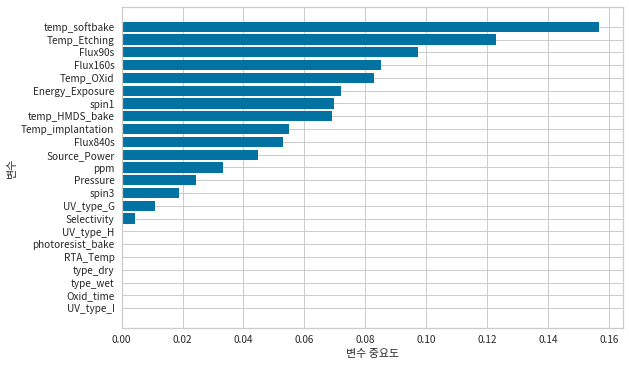

In [44]:
df_importance.sort_values('Importance', ascending=True, inplace =True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width=df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

# 3) RandomForest

In [45]:
para_n_esti = [n_tree * 10 for n_tree in range(1,11)]
para_depth = [i for i in range(1,11)]
para_split = [i*2 for i in range(2,20)]
para_leaf = [i for i in range(1,10)]

In [46]:
estimator = RandomForestClassifier(random_state = 1234)

param_random = {'max_depth' : para_depth,
             'min_samples_split' : para_split,
             'min_samples_leaf' : para_leaf,
             'n_estimators' : para_n_esti}

random_rf = RandomizedSearchCV(estimator, param_random, n_jobs=-1, n_iter=5000)
random_rf.fit(df_train_x_scaled, df_train_y)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=1234),
                   n_iter=5000, n_jobs=-1,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'min_samples_split': [4, 6, 8, 10, 12,
                                                              14, 16, 18, 20,
                                                              22, 24, 26, 28,
                                                              30, 32, 34, 36,
                                                              38],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]})

In [47]:
print('best estimator model: \n{}'.format(random_rf.best_estimator_))
print('\nbest parameter: \n{}'.format(random_rf.best_params_))
print()
print()
print('\nbest train_dataset score: {}'.format(random_rf.best_score_.round(3)))
print('\nbest test_dataset score: {}'.format(random_rf.best_estimator_.score(df_test_x_scaled, df_test_y).round(3)))

best estimator model: 
RandomForestClassifier(max_depth=10, min_samples_split=4, n_estimators=30,
                       random_state=1234)

best parameter: 
{'n_estimators': 30, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': 10}



best train_dataset score: 0.937

best test_dataset score: 0.954


In [48]:
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = random_rf.best_estimator_.feature_importances_

df_importance.sort_values('Importance', ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
1,Temp_OXid,0.077
13,Flux90s,0.075
4,Energy_Exposure,0.074
0,Pressure,0.073
12,Temp_Etching,0.066
7,spin3,0.065
9,temp_softbake,0.063
8,photoresist_bake,0.060
2,ppm,0.056
10,Source_Power,0.054


Text(0, 0.5, '변수')

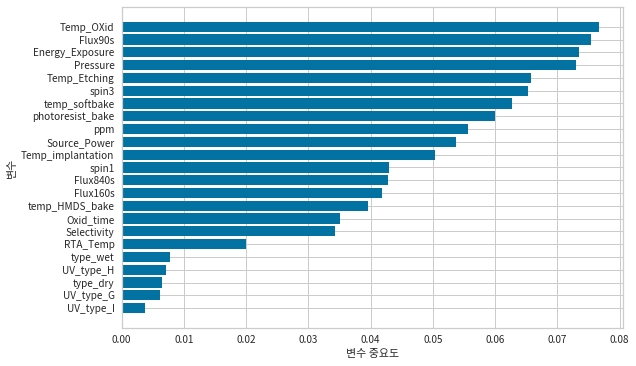

In [49]:
df_importance.sort_values('Importance', ascending=True, inplace =True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width=df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

# 4) Gradient Boosting

In [50]:
para_n_esti = [n_tree * 10 for n_tree in range(1,11)]
para_depth = [i for i in range(1,11)]
para_split = [i*2 for i in range(2,20)]
para_leaf = [i for i in range(1,10)]
para_lr = [lr * 0.1 for lr in range(1,10)]

In [51]:
estimator = GradientBoostingClassifier(random_state = 1234)

param_random = {
             'max_features' : ['sqrt', 'log2'],
             'max_depth' : para_depth,
             'min_samples_split' : para_split,
             'min_samples_leaf' : para_leaf,
             'n_estimators' : para_n_esti,
             'learning_rate' : para_lr}

rand_GB = RandomizedSearchCV(estimator, param_random, n_jobs=-1, cv=5, n_iter=5000)
rand_GB.fit(df_train_x_scaled, df_train_y)

RandomizedSearchCV(cv=5,
                   estimator=GradientBoostingClassifier(random_state=1234),
                   n_iter=5000, n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.2,
                                                          0.30000000000000004,
                                                          0.4, 0.5,
                                                          0.6000000000000001,
                                                          0.7000000000000001,
                                                          0.8, 0.9],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'min_samples_split': [4, 6, 8, 10, 12,
                                                              14, 16, 18, 20,
                                                              22, 24, 26, 28,
                                                              30, 32, 34, 36,
                                                              38],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]})

In [52]:
print('best estimator model: \n{}'.format(rand_GB.best_estimator_))
print('\nbest parameter: \n{}'.format(rand_GB.best_params_))
print()
print()
print('\nbest train_dataset score: {}'.format(rand_GB.best_score_.round(4)))
print('\nbest test_dataset score: {}'.format(rand_GB.best_estimator_.score(df_test_x_scaled, df_test_y).round(4)))

best estimator model: 
GradientBoostingClassifier(learning_rate=0.7000000000000001, max_depth=6,
                           max_features='sqrt', min_samples_leaf=8,
                           min_samples_split=36, random_state=1234)

best parameter: 
{'n_estimators': 100, 'min_samples_split': 36, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'max_depth': 6, 'learning_rate': 0.7000000000000001}



best train_dataset score: 0.9621

best test_dataset score: 0.9759


In [53]:
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = rand_GB.best_estimator_.feature_importances_

df_importance.sort_values('Importance', ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
10,Source_Power,0.125
13,Flux90s,0.114
6,spin1,0.094
14,Flux160s,0.090
9,temp_softbake,0.087
7,spin3,0.051
19,type_wet,0.050
16,Temp_implantation,0.042
5,temp_HMDS_bake,0.042
1,Temp_OXid,0.041


Text(0, 0.5, '변수')

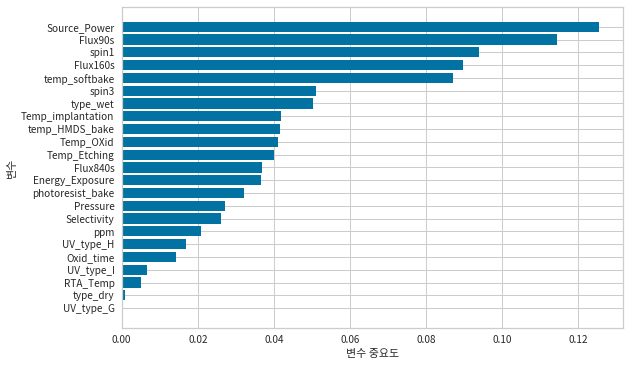

In [54]:
df_importance.sort_values('Importance', ascending=True, inplace =True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width=df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

# 5) XGBoost

In [55]:
para_depth = [i for i in range(1,11)]
para_bytree = [i*0.1 for i in range(1,10)]
para_subsam = [i*0.1 for i in range(1,10)]
para_n_esti = [n_tree * 10 for n_tree in range(1,11)]
gamma_list = [i*0.1 for i in range(1,10)]
para_lr = [lr * 0.1 for lr in range(1,10)]

In [56]:
estimator = xgb.XGBClassifier(random_state = 1234)

param_random = {
             'max_depth' : para_depth,
             'colsample_bytree' : para_bytree,
             'subsample' : para_subsam,
             'n_estimators' : para_n_esti,
               'gamma' : gamma_list,
                'learning_rate' :para_lr}
1.000
random_xgb = RandomizedSearchCV(estimator, param_random, n_jobs=-1, cv=5, n_iter=5000)
random_xgb.fit(df_train_x_scaled, df_train_y)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                        'gamma': [0.1, 0.2, 0.30000000000000004,
                                                  0.4, 0.5, 0.6000000000000001,
                                                  0.7000000000000001, 0.8,
                                                  0.9],
                                        'learning_rate': [0.1, 0.2,
                                                          0.30000000000000004,
                                                          0.4, 0.5,
                                                          0.6000000000000001,
                                                          0.7000000000000001,
                                                          0.8, 0.9],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100],
                                        'subsample': [0.1, 0.2,
                                                      0.30000000000000004, 0.4,
                                                      0.5, 0.6000000000000001,
                                                      0.7000000000000001, 0.8,
                                                      0.9]})

In [57]:
print('best estimator model: \n{}'.format(random_xgb.best_estimator_))
print('\nbest parameter: \n{}'.format(random_xgb.best_params_))
print()
print()
print('\nbest train_dataset score: {}'.format(random_xgb.best_score_.round(3)))
print('\nbest test_dataset score: {}'.format(random_xgb.best_estimator_.score(df_test_x_scaled, df_test_y).round(3)))

best estimator model: 
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.30000000000000004, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=0.1, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.30000000000000004,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=8,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=80, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=1234,
              reg_alpha=0, reg_lambda=1, ...)

best parameter: 
{'subsample': 0.9, 'n_estimators': 80, 'max_depth': 8, 'learning_rate': 0.30000000000000004, 'gamma': 0.1, 'colsample_bytree': 0.30000000000000004}



best train_dataset score: 0.958

best test_dataset score: 0.974


In [58]:
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = random_xgb.best_estimator_.feature_importances_

df_importance.sort_values('Importance', ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
19,type_wet,0.074
22,UV_type_I,0.071
18,type_dry,0.058
8,photoresist_bake,0.057
7,spin3,0.056
9,temp_softbake,0.054
4,Energy_Exposure,0.053
3,Oxid_time,0.053
6,spin1,0.050
14,Flux160s,0.047


Text(0, 0.5, '변수')

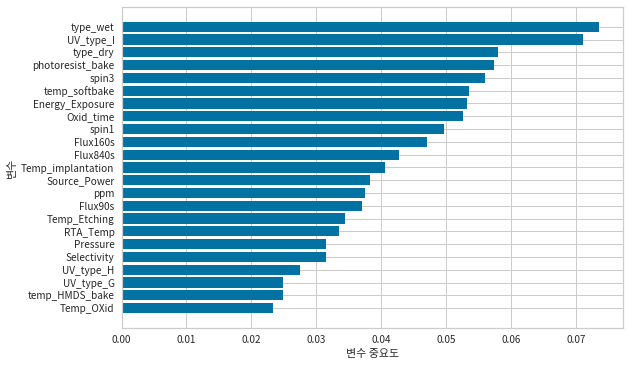

In [59]:
df_importance.sort_values('Importance', ascending=True, inplace =True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width=df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

# 6) SVM

In [60]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,10],'kernel': ['rbf', 'poly', 'sigmoid']}

In [61]:
grid_SVM = GridSearchCV(SVC(),param_grid,refit=True)
grid_SVM.fit(df_train_x_scaled,df_train_y)
print('\nbest parameter: \n{}'.format(grid_SVM.best_params_))
print()
print()
print('\nbest train_dataset score: {}'.format(grid_SVM.best_score_.round(3)))
print('\nbest test_dataset score: {}'.format(grid_SVM.best_estimator_.score(df_test_x_scaled, df_test_y).round(3)))


best parameter: 
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}



best train_dataset score: 0.946

best test_dataset score: 0.952


- SVM은 feature_importance method 지원 안함

# 7) MLP

In [62]:
param_random = {'activation': ['relu'], 
              'hidden_layer_sizes': [10* hidden for hidden in range(1,9)],
              'solver': ['adam'], 
              'batch_size' : [20* batch for batch in range(1,10)]}

random_MLP = RandomizedSearchCV(MLPClassifier(max_iter = 1000, early_stopping=True), param_random, n_jobs=-1, cv=5, n_iter=1000)
random_MLP.fit(df_train_x_scaled, df_train_y)

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 72 is smaller than n_iter=1000. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/an

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserW

RandomizedSearchCV(cv=5,
                   estimator=MLPClassifier(early_stopping=True, max_iter=1000),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'activation': ['relu'],
                                        'batch_size': [20, 40, 60, 80, 100, 120,
                                                       140, 160, 180],
                                        'hidden_layer_sizes': [10, 20, 30, 40,
                                                               50, 60, 70, 80],
                                        'solver': ['adam']})

In [63]:
print('\nbest parameter: \n{}'.format(random_MLP.best_params_))
print()
print()
print('\nbest train_dataset score: {}'.format(random_MLP.best_score_.round(3)))
print('\nbest test_dataset score: {}'.format(random_MLP.best_estimator_.score(df_test_x_scaled, df_test_y).round(3)))


best parameter: 
{'solver': 'adam', 'hidden_layer_sizes': 70, 'batch_size': 20, 'activation': 'relu'}



best train_dataset score: 0.932

best test_dataset score: 0.936


# 8) KNN

In [64]:
grid_params = {
    'n_neighbors' : list(range(1,20)),
    'weights' : ["uniform", "distance"],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}

In [65]:
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, grid_params)
grid_knn.fit(df_train_x_scaled,df_train_y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19],
                         'weights': ['uniform', 'distance']})

In [66]:
print('\nbest parameter: \n{}'.format(grid_knn.best_params_))
print()
print()
print('\nbest train_dataset score: {}'.format(grid_knn.best_score_.round(3)))
print('\nbest test_dataset score: {}'.format(grid_knn.best_estimator_.score(df_test_x_scaled, df_test_y).round(3)))


best parameter: 
{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}



best train_dataset score: 0.954

best test_dataset score: 0.966


# 모델평가

In [67]:
model = ['DecisionTree', 'RandomForest', 'GradientBoosting', 'XGBoost', 'SVM', 'MLP', 'KNN']

train_accuracy = []; test_accuracy = []; model_f1_score = []

### 1) DT

In [68]:
y_pred = (tree.predict_proba(df_test_x_scaled)[:,1] >= 0.037).astype(int)
train_accuracy.append(tree.score(df_train_x_scaled, df_train_y))
test_accuracy.append(tree.score(df_test_x_scaled, df_test_y))
model_f1_score.append(f1_score(df_test_y, y_pred))

### 2) RF

In [69]:
y_pred = (random_rf.predict_proba(df_test_x_scaled)[:,1] >= 0.037).astype(int)
train_accuracy.append(random_rf.score(df_train_x_scaled, df_train_y))
test_accuracy.append(random_rf.score(df_test_x_scaled, df_test_y))
model_f1_score.append(f1_score(df_test_y, y_pred))

### 3) GB

In [91]:
for i in np.arange(0,1,0.01):
    print('-'*10)
    print('threshold', i)
    y_pred = (rand_GB.predict_proba(df_test_x_scaled)[:,1] >= i).astype(int)
    print(f1_score(df_test_y, y_pred))
    
    

----------
threshold 0.0
0.1348314606741573
----------
threshold 0.01
0.7894736842105262
----------
threshold 0.02
0.8
----------
threshold 0.03
0.8108108108108109
----------
threshold 0.04
0.8219178082191781
----------
threshold 0.05
0.8219178082191781
----------
threshold 0.06
0.8219178082191781
----------
threshold 0.07
0.8219178082191781
----------
threshold 0.08
0.8219178082191781
----------
threshold 0.09
0.8219178082191781
----------
threshold 0.1
0.8333333333333334
----------
threshold 0.11
0.8333333333333334
----------
threshold 0.12
0.8333333333333334
----------
threshold 0.13
0.8169014084507044
----------
threshold 0.14
0.8169014084507044
----------
threshold 0.15
0.8169014084507044
----------
threshold 0.16
0.8169014084507044
----------
threshold 0.17
0.8169014084507044
----------
threshold 0.18
0.8169014084507044
----------
threshold 0.19
0.8169014084507044
----------
threshold 0.2
0.8285714285714286
----------
threshold 0.21
0.8285714285714286
----------
threshold 0.22
0.

In [89]:
y_pred = (rand_GB.predict_proba(df_test_x_scaled)[:,1] >= 0.21).astype(int)
f1_score(df_test_y, y_pred)

0.8285714285714286

In [70]:
y_pred = (rand_GB.predict_proba(df_test_x_scaled)[:,1] >= 0.037).astype(int)
train_accuracy.append(rand_GB.score(df_train_x_scaled, df_train_y))
test_accuracy.append(rand_GB.score(df_test_x_scaled, df_test_y))
model_f1_score.append(f1_score(df_test_y, y_pred))

### 4) XGB

In [71]:
y_pred = (random_xgb.predict_proba(df_test_x_scaled)[:,1] >= 0.037).astype(int)
train_accuracy.append(random_xgb.score(df_train_x_scaled, df_train_y))
test_accuracy.append(random_xgb.score(df_test_x_scaled, df_test_y))
model_f1_score.append(f1_score(df_test_y, y_pred))

### 5) SVM

In [72]:
y_pred = grid_SVM.predict(df_test_x_scaled)
train_accuracy.append(grid_SVM.score(df_train_x_scaled, df_train_y))
test_accuracy.append(grid_SVM.score(df_test_x_scaled, df_test_y))
model_f1_score.append(f1_score(df_test_y, y_pred))

### 6) MLP

In [73]:
y_pred = (random_MLP.predict_proba(df_test_x_scaled)[:,1] >= 0.037).astype(int)
train_accuracy.append(random_MLP.score(df_train_x_scaled, df_train_y))
test_accuracy.append(random_MLP.score(df_test_x_scaled, df_test_y))
model_f1_score.append(f1_score(df_test_y, y_pred))

### 7) KNN

In [74]:
y_pred = (grid_knn.predict_proba(df_test_x_scaled)[:,1] >= 0.037).astype(int)
train_accuracy.append(grid_knn.score(df_train_x_scaled, df_train_y))
test_accuracy.append(grid_knn.score(df_test_x_scaled, df_test_y))
model_f1_score.append(f1_score(df_test_y, y_pred))

In [75]:
df_eval = pd.DataFrame(index=model)
df_eval['Train_Accuracy'] = train_accuracy
df_eval['Test_Accuracy'] = test_accuracy
df_eval['F1_score'] = model_f1_score

df_eval.round(3)


,Train_Accuracy,Test_Accuracy,F1_score
DecisionTree,0.981,0.940,0.380
RandomForest,0.991,0.954,0.245
GradientBoosting,1.000,0.976,0.811
XGBoost,1.000,0.974,0.602
SVM,0.994,0.952,0.636
MLP,0.933,0.936,0.155
KNN,1.000,0.966,0.430


In [137]:
plt.style.use(['fivethirtyeight'])

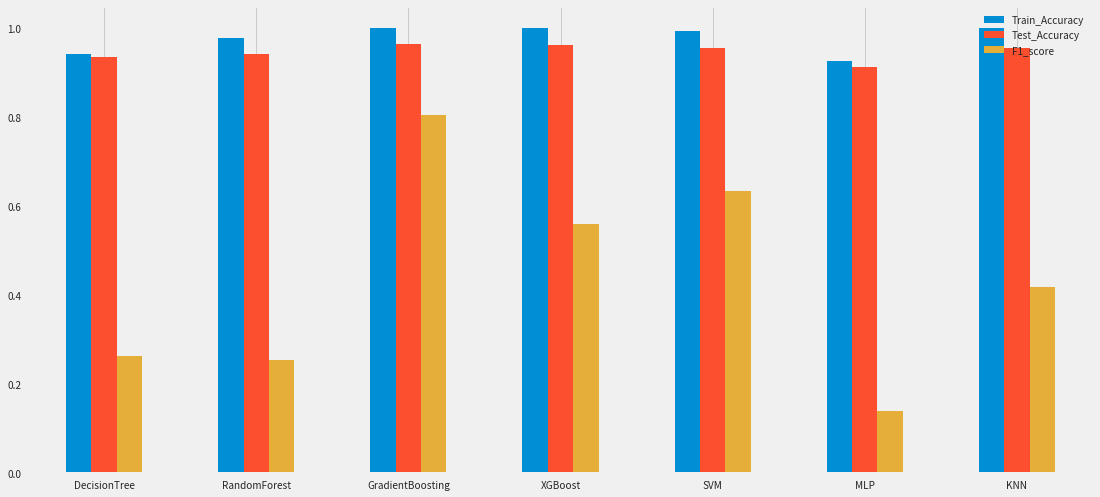

In [138]:
df_eval.plot.bar(rot=0, figsize=(17,8))
plt.legend(loc = 'upper right')
plt.grid(axis='y')

In [ ]:
import pickle

In [ ]:
filename = 'rand_GB.model'

In [ ]:
pickle.dump(rand_GB, open(filename, 'wb'))